## API Request Response Time Testing Model

GOAL:

Build a model that will test an API's request response time using Pythons Requests library 

Useful:

If a client/customer advises they are having issues with an API timing out(potentially at certain times etc.). Minimally the client may request the best timeout thresholds/paramters to succesfully hit the server and perform their required functionality. 

The following script will build a Model that will help build/gauge the best timeout parameter's for an endpoint based on tesing data. Please see details further below.

- Use a pubic testing endpoint (for testing/data privacy purposes)
- Code this model using Python Requests linbrary 
- Run x amount of tests (this will depend on functionality etc.)
- Implement more than one set of values into the Model for testing our Timeout paramters
- Extract the elapsed time disussed below form our Model (requests elapsed time property)
- Input this into pandas dataframe and visually analyse our findings

NOTE

The aim/functionality of this Model is to simply to have three test sets containing 100 tests. We will use random predefined timeout parameters for each of the three test sets. Depending 

#### Import Requried Libraries

In [1]:
import numpy as np
import pandas as pd

import json # Python built-in package json for encoding and decoding JSON data.
import requests # library for working with HTTP requests in Python

from requests.exceptions import Timeout
from requests.adapters import HTTPAdapter
from requests.exceptions import ConnectionError

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

Next, we will discuss some key concepts when using Python's request library.

#### API Performance Analysis
- Requests Elapsed Time Proprty

The response object returned by post|get requests has a property called elapsed, which provides the time delta between when the request was sent and when the response was received. We can apply total_seconds() method to return this time in seconds. This is useful for testing threshold for our timeout parameter.

- SESSIONS

Sessions object from the Request library enables us to control how requests are being made or to improve the performance of your requests, you may need to use a Session instance directly. Sessions are used to persist parameters across requests. The primary performance optimization of sessions comes in the form of persistent connections. When your app makes a connection to a server using a Session, it keeps that connection around in a connection pool. When your app wants to connect to the same server again, it will reuse a connection from the pool rather than establishing a new one.

- Max Retries

When a request fails, you may want your application to retry the same request. However, requests will not do this for you by default. To apply this functionality, you need to implement a custom Transport Adapter.

Transport Adapters let you define a set of configurations per service you’re interacting with.

- Timeouts

When you make an inline request to an external service, your system will need to wait upon the response before moving on. If your application waits too long for that response, requests to your service could back up, your user experience could suffer, or your background jobs could hang.

By default, requests will wait indefinitely on the response, so you should almost always specify a timeout duration to prevent these things from happening. To set the request’s timeout, use the timeout parameter. timeout can be an integer or float representing the number of seconds to wait on a response before timing out.

NOTE

You can also pass a tuple to timeout with the first element being a connect timeout (the time it allows for the client to establish a connection to the server), and the second being a read timeout (the time it will wait on a response once your client has established a connection)


#### Model Settings
- Pre-define values for running in our model (timeout threshold)
- Create empty lists that will be used to extract specific data from our model
- Implement a counter variable that will be incremented when our model is running. This will enable us to control testing ie. STOPS the model one a threshold has been reached
- Loop using the range function (the no. of tests we want to run within each test set)

In [2]:
# Model Timeout Paramter values
t1 = [0.1,0.2,'Label-Test-1'] # list data structure (ordered)
t2 = [0.4,0.6,'Label-Test-2']
t3 = [0.5,0.8,'Label-Test-3']
dict = {'test_1':t1,'test_2':t2,'test_3':t3} # add list data to dictionary

# Generate list data 1 - x for each individual test 
tests=[] # empty list
request_times = [] # UTC request time (note list data structure to maintain order of our data)
elapsed_times = [] # server response time
category = []

counter = 0 # Emply counter variable which will act as our model test threhold value ie. when the model will stop running

# loop that will build test range
for i in range(1,101,1): # range(start,stop.step)
    tests.append(i) # append (add) items to list

### Model 
Build out our model and run our code to extract the required informatiom for evaluation/analysis

In [3]:
for key,value in dict.items(): # TEST-SET (3)
    print("-------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------")
    print("TEST-SET : ", key)
    #
    url = "https://api.coindesk.com/v1/bpi/currentprice.json"
    set_adapter = HTTPAdapter(max_retries = 3) # Build Transport Adapter, input max_retries parameter, and mount it to an existing Session:
    time = (value[0],value[1]) # connection timeout (connect,read) seconds
    
    #
    for test in tests:
        if counter < len(tests):
            counter += 1
            print("Test :",counter)
            print("Timeout-Paramter-Values : ", time)
            
            #
            with requests.Session() as session:
                session.mount(url, set_adapter)
                try:
                    #
                    response = session.get(url, timeout=time)
                    dt_request = datetime.now() # Getting the current date and time request executed/processes (time will be close to time server was hit for request)
                    request_times.append(dt_request)
                    timestamp = datetime.timestamp(dt_request) # Getting the timestamp (time will be close to time server was hit for request)
                    
                    #
                    response.raise_for_status() # check if succesfull repsonse code
                    print("Request-Status-Code : {}".format(response.raise_for_status)) # get request status code
                    print("Server Request Date | Time (UTC) : ", dt_request)
                    
                    # label
                    category.append(value[2])
                    print(value[2])
                    
                    #
                    print()
                    print("Requests-Proporty-Server-Repsonse-Time-Seconds",response.elapsed.total_seconds()) # requests property elapsed returns delta between request sent and response receieved
                    time = response.elapsed.total_seconds()
                    elapsed_times.append(time)
                    print()
                    
                    #
                except requests.exceptions.TimeoutError as error:
                    print("Timeout-Error")
                    raise SystemExit(error)    
                except requests.exceptions.ConnectionError as error:
                    print("Connetion Error Raised")
                    raise SystemExit(error)
                except requests.exceptions.HTTPError as error:
                    print("HTTP Error Raised")
                    raise SystemExit(error)
        if counter >= len(tests):
            counter = 0

# Create DataFrame using dictionariy data sturcutre and dataframe method
threshold = pd.DataFrame ({'Request Time UTC':request_times,'Server Request Response Time Seconds':elapsed_times,'Test-Label':category})
threshold.head()

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
TEST-SET :  test_1
Test : 1
Timeout-Paramter-Values :  (0.1, 0.2)
Request-Status-Code : <bound method Response.raise_for_status of <Response [200]>>
Server Request Date | Time (UTC) :  2023-11-20 21:56:13.821611
Label-Test-1

Requests-Proporty-Server-Repsonse-Time-Seconds 0.106915

Test : 2
Timeout-Paramter-Values :  0.106915
Request-Status-Code : <bound method Response.raise_for_status of <Response [200]>>
Server Request Date | Time (UTC) :  2023-11-20 21:56:13.877442
Label-Test-1

Requests-Proporty-Server-Repsonse-Time-Seconds 0.052779

Test : 3
Timeout-Paramter-Values :  0.052779
Request-Status-Code : <bound method Response.raise_for_status of <Response [200]>>
Server Request Date | Time (UTC) :  2023-11-20 21:56:13.933016
Label-Test-1

Requests-Proporty-

,Request Time UTC,Server Request Response Time Seconds,Test-Label
0,2023-11-20 21:56:13.821611,0.106915,Label-Test-1
1,2023-11-20 21:56:13.877442,0.052779,Label-Test-1
2,2023-11-20 21:56:13.933016,0.050941,Label-Test-1
3,2023-11-20 21:56:13.994723,0.057249,Label-Test-1
4,2023-11-20 21:56:14.072444,0.071565,Label-Test-1


### Model Evaluation
- Visualize the data across all three test sets 

In [4]:
# subsetting based on categorical data (Pandas isin method)
t1 = threshold['Test-Label'].isin(['Label-Test-1'])
t1 = threshold[t1]
t2 = threshold['Test-Label'].isin(['Label-Test-2'])
t2 = threshold[t2]
t3 = threshold['Test-Label'].isin(['Label-Test-3'])
t3 = threshold[t3]

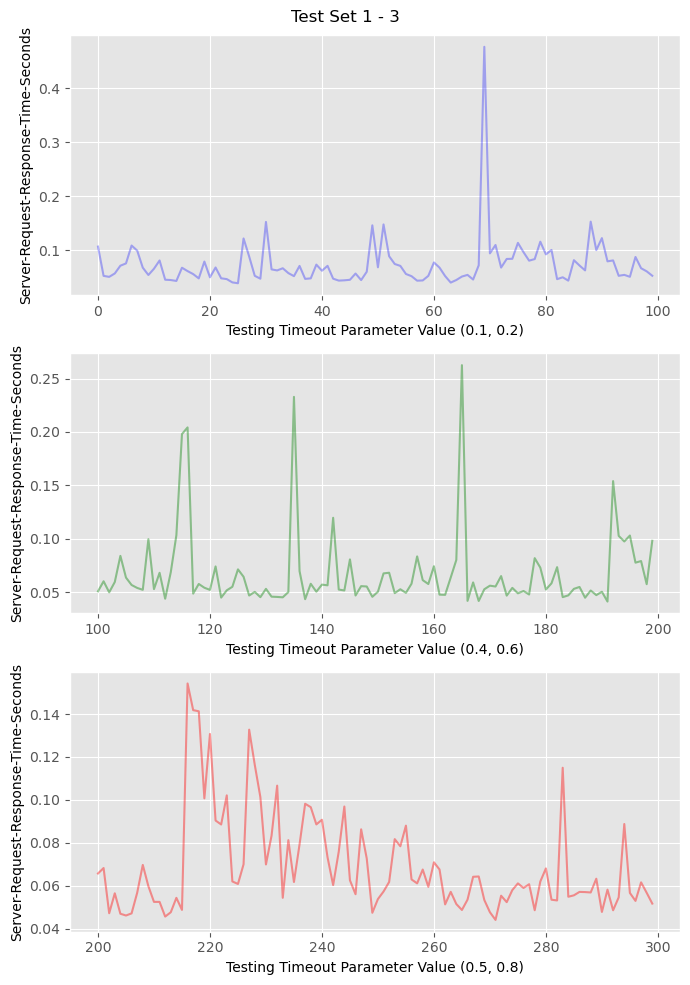

In [5]:
# Generate Line Plots (Subplots)
plt.style.use('ggplot')
fig, ax = plt.subplots(3, figsize = (7,10), sharey= False)
fig.suptitle('Test Set 1 - 3')

#
ax[0].plot(t1.index, t1['Server Request Response Time Seconds'],color = 'b', alpha = 0.3)
ax[1].plot(t2.index, t2['Server Request Response Time Seconds'], color = 'g', alpha = 0.4)
ax[2].plot(t3.index, t3['Server Request Response Time Seconds'], color = 'r', alpha = 0.4)

#Set xlabes
ax[0].set_xlabel('Testing Timeout Parameter Value (0.1, 0.2)')
ax[1].set_xlabel('Testing Timeout Parameter Value (0.4, 0.6)')
ax[2].set_xlabel('Testing Timeout Parameter Value (0.5, 0.8)')

#set y labels
ax[0].set_ylabel('Server-Request-Response-Time-Seconds')
ax[1].set_ylabel('Server-Request-Response-Time-Seconds')
ax[2].set_ylabel('Server-Request-Response-Time-Seconds')

#Set spacing
fig.tight_layout()
plt.show()